In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Import the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel("/content/drive/My Drive/AIML/Capstone/Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [5]:
data.shape

(425, 11)

#### Step 2: Data cleansing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ KB


In [7]:
data.isnull().sum()

,0
Unnamed: 0,0
Data,0
Countries,0
Local,0
Industry Sector,0
Accident Level,0
Potential Accident Level,0
Genre,0
Employee or Third Party,0
Critical Risk,0


In [8]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={'Data':'Date of Occurance', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employment Type'}, inplace=True)
data.head()

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date of Occurance         425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employment Type           425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [10]:
data.describe().T

,count,mean,min,25%,50%,75%,max
Date of Occurance,425,2016-09-20 16:46:18.352941312,2016-01-01 00:00:00,2016-05-01 00:00:00,2016-09-13 00:00:00,2017-02-08 00:00:00,2017-07-09 00:00:00


In [11]:
data.duplicated().sum()

7

In [12]:
duplicates = data.duplicated()

data[duplicates]

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(418, 10)

In [15]:
def find_unique_val_per_cols(data):
  for col in data.columns:
    if col != 'Description' and col != 'Data':
      print('--'*20)
      print(f'Unique values in "{col}" column are')
      print('--'*20)
      print(data[col].unique())
      print('\n')


In [16]:
find_unique_val_per_cols(data)

----------------------------------------
Unique values in "Date of Occurance" column are
----------------------------------------
<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-06 00:00:00',
 '2016-01-08 00:00:00', '2016-01-10 00:00:00', '2016-01-12 00:00:00',
 '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-19 00:00:00',
 '2016-01-26 00:00:00',
 ...
 '2017-06-24 00:00:00', '2017-06-20 00:00:00', '2017-06-23 00:00:00',
 '2017-06-19 00:00:00', '2017-06-22 00:00:00', '2017-06-29 00:00:00',
 '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00',
 '2017-07-09 00:00:00']
Length: 287, dtype: datetime64[ns]


----------------------------------------
Unique values in "Country" column are
----------------------------------------
['Country_01' 'Country_02' 'Country_03']


----------------------------------------
Unique values in "Local" column are
----------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_

In [17]:
def count_plot(data, feature):
  sns.countplot(data = data, x = feature)

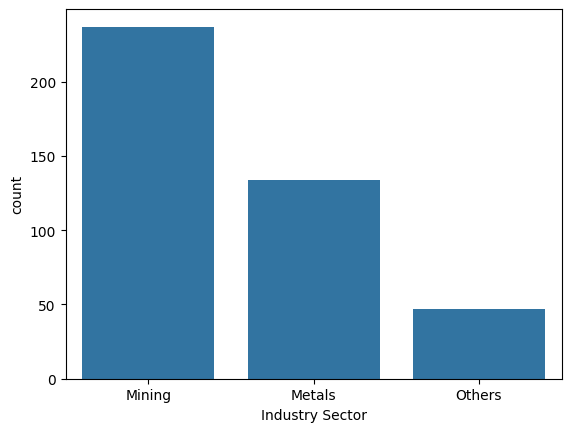

In [18]:
count_plot(data,"Industry Sector")

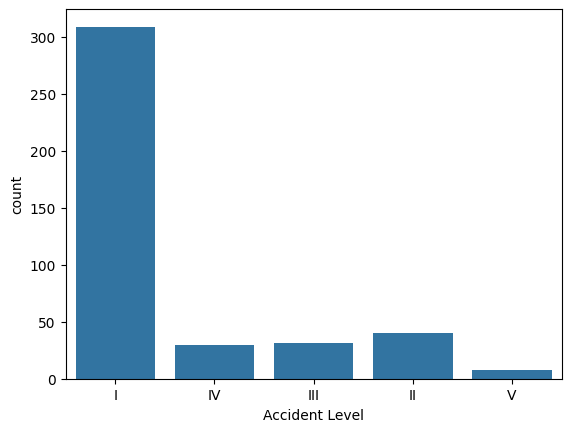

In [19]:
count_plot(data,"Accident Level")

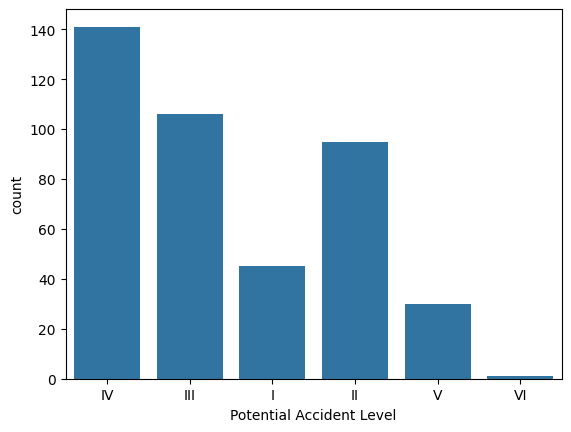

In [20]:
count_plot(data,"Potential Accident Level")

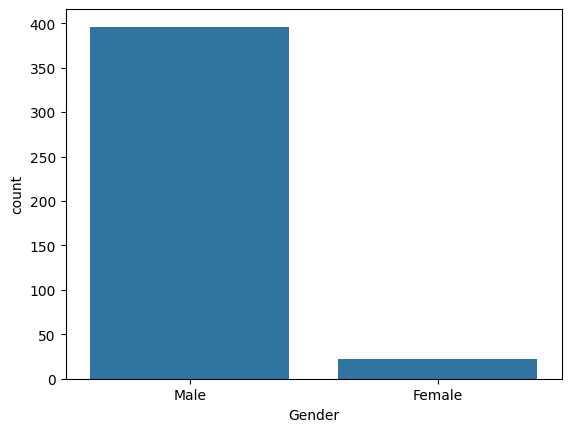

In [21]:
count_plot(data,"Gender")

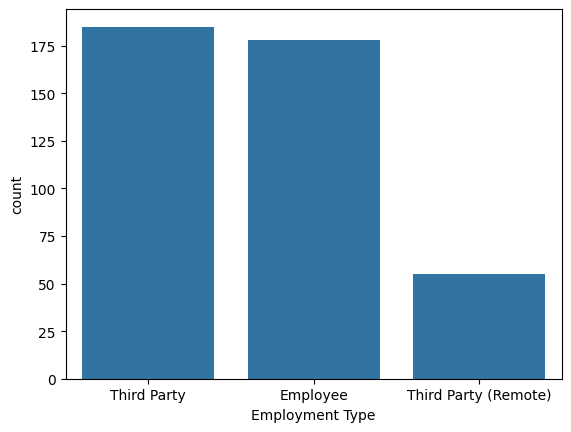

In [22]:
count_plot(data,"Employment Type")

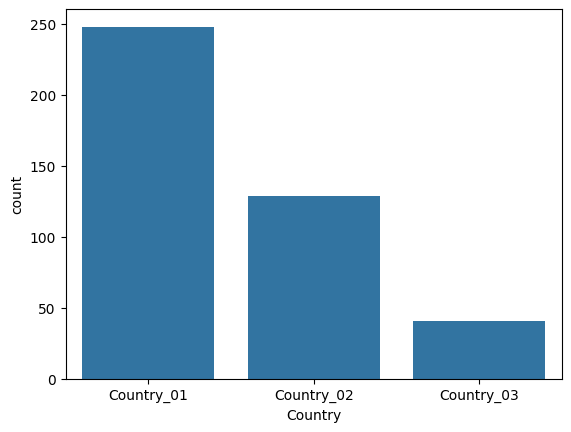

In [23]:
count_plot(data,"Country")

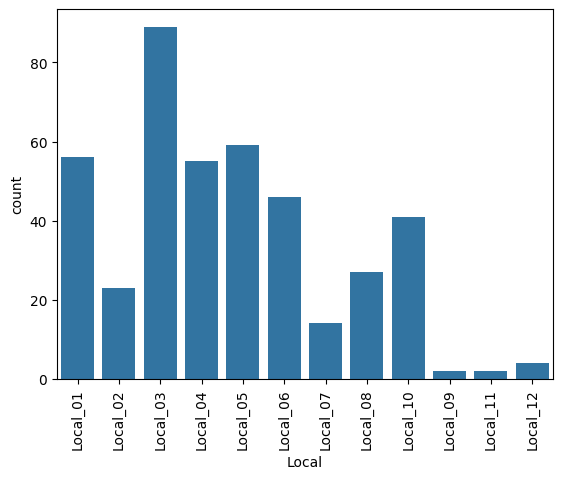

In [24]:
#sns.histplot(data = data, x = "Local")
count_plot(data,"Local")
plt.xticks(rotation=90)
plt.show()


In [25]:
data["Description"].head(10)

,Description
0,While removing the drill rod of the Jumbo 08 f...
1,During the activation of a sodium sulphide pum...
2,In the sub-station MILPO located at level +170...
3,Being 9:45 am. approximately in the Nv. 1880 C...
4,Approximately at 11:45 a.m. in circumstances t...
5,During the unloading operation of the ustulado...
6,The collaborator reports that he was on street...
7,"At approximately 04:50 p.m., when the mechanic..."
8,Employee was sitting in the resting area at le...
9,At the moment the forklift operator went to ma...


#### Step 3: Data preprocessing

In [28]:
data['Year'] = data["Date of Occurance"].apply(lambda x : x.year)
data['Month'] = data["Date of Occurance"].apply(lambda x : x.month)
data['Day'] = data["Date of Occurance"].apply(lambda x : x.day)
data['Weekday'] = data["Date of Occurance"].apply(lambda x : x.day_name())
data['WeekofYear'] = data["Date of Occurance"].apply(lambda x : x.weekofyear)

data.head()

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


In [29]:
find_unique_val_per_cols(data)

----------------------------------------
Unique values in "Date of Occurance" column are
----------------------------------------
<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-06 00:00:00',
 '2016-01-08 00:00:00', '2016-01-10 00:00:00', '2016-01-12 00:00:00',
 '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-19 00:00:00',
 '2016-01-26 00:00:00',
 ...
 '2017-06-24 00:00:00', '2017-06-20 00:00:00', '2017-06-23 00:00:00',
 '2017-06-19 00:00:00', '2017-06-22 00:00:00', '2017-06-29 00:00:00',
 '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00',
 '2017-07-09 00:00:00']
Length: 287, dtype: datetime64[ns]


----------------------------------------
Unique values in "Country" column are
----------------------------------------
['Country_01' 'Country_02' 'Country_03']


----------------------------------------
Unique values in "Local" column are
----------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_

In [30]:
data['Year'].unique()

array([2016, 2017])

#### Step 3: EDA Analysis

In [31]:
total_row_count = data.shape[0]

country_01_count = data[data.Country == 'Country_01'].shape[0]
country_02_count = data[data.Country == 'Country_02'].shape[0]
country_03_count = data[data.Country == 'Country_03'].shape[0]

country_01_count_pct = (country_01_count/total_row_count)*100
country_02_count_pct = (country_02_count/total_row_count)*100
country_03_count_pct = (country_03_count/total_row_count)*100

print(f'Country_01 count: {country_01_count} ({country_01_count_pct}%)')
print(f'Country_02 count: {country_02_count} ({country_02_count_pct}%)')
print(f'Country_03 count: {country_03_count} ({country_03_count_pct}%)')


Country_01 count: 248 (59.33014354066985%)
Country_02 count: 129 (30.861244019138756%)
Country_03 count: 41 (9.808612440191387%)


In [32]:
country_wise_val_count = data['Country'].value_counts()

Distributon of `Country` label
------------------------------------------------------------


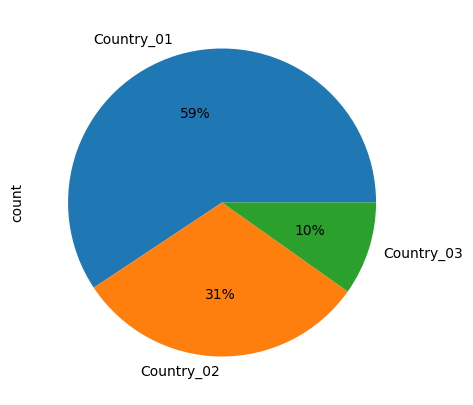

In [33]:
print('Distributon of `Country` label')
print('--'*30)
_ = country_wise_val_count.plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (8, 5))

In [34]:
local_count = np.round(data['Local'].value_counts(normalize=True) * 100)
local_df = local_count.to_frame(name='Types_of_Locals')

In [35]:
import plotly.express as px

px.bar(local_df).update_layout(title="Local Count", xaxis_title="Locals", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

In [36]:
Mining_count = data[data['Industry Sector'] == 'Mining'].shape[0]
Metals_count = data[data['Industry Sector'] == 'Metals'].shape[0]
Others_count = data[data['Industry Sector'] == 'Others'].shape[0]

Mining_count_pct = (Mining_count/total_row_count)*100
Metals_count_pct = (Metals_count/total_row_count)*100
Others_count_pct = (Others_count/total_row_count)*100

print(f'Mining count: {Mining_count} ({Mining_count_pct}%)')
print(f'Metals count: {Metals_count} ({Metals_count_pct}%)')
print(f'Others count: {Others_count} ({Others_count_pct}%)')

print('--'*30)
print('Distributon of `Industry Sector` label')
print('--'*30)

sector_count = np.round(data['Industry Sector'].value_counts(normalize=True) * 100)

sector_df = sector_count.to_frame(name='Types_of_Sectors')


px.bar(sector_df).update_layout(title="Industry Sector Count", xaxis_title="Sectors", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

Mining count: 237 (56.698564593301434%)
Metals count: 134 (32.057416267942585%)
Others count: 47 (11.24401913875598%)
------------------------------------------------------------
Distributon of `Industry Sector` label
------------------------------------------------------------


----------------------------------------
Value Counts for `Accident Level` label
----------------------------------------
Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Value Counts for `Potential Accident Level
--------------------------------------------------------------------------------
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 30 i.e. 7.0%
Potential Accident Level - VI count: 1 i.e. 0.0%
------------------------------------------------------------
Distributon of `Accident Level` & `Potential Accident Level` label
---------------------

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
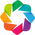

:Bars   [Severity,Levels]   (value)

In [37]:
print('--'*20)
print('Value Counts for `Accident Level` label')
print('--'*20)

accident_level_I_count = data[data['Accident Level'] == 'I'].shape[0]
accident_level_II_count = data[data['Accident Level'] == 'II'].shape[0]
accident_level_III_count = data[data['Accident Level'] == 'III'].shape[0]
accident_level_IV_count = data[data['Accident Level'] == 'IV'].shape[0]
accident_level_V_count = data[data['Accident Level'] == 'V'].shape[0]
accident_level_VI_count = data[data['Accident Level'] == 'VI'].shape[0]

print(f'Accident Level - I count: {accident_level_I_count} i.e. {round(accident_level_I_count/total_row_count*100, 0)}%')
print(f'Accident Level - II count: {accident_level_II_count} i.e. {round(accident_level_II_count/total_row_count*100, 0)}%')
print(f'Accident Level - III count: {accident_level_III_count} i.e. {round(accident_level_III_count/total_row_count*100, 0)}%')
print(f'Accident Level - IV count: {accident_level_IV_count} i.e. {round(accident_level_IV_count/total_row_count*100, 0)}%')
print(f'Accident Level - V count: {accident_level_V_count} i.e. {round(accident_level_V_count/total_row_count*100, 0)}%')
print(f'Accident Level - VI count: {accident_level_VI_count} i.e. {round(accident_level_VI_count/total_row_count*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

potential_accident_level_I_count = data[data['Potential Accident Level'] == 'I'].shape[0]
potential_accident_level_II_count = data[data['Potential Accident Level'] == 'II'].shape[0]
potential_accident_level_III_count = data[data['Potential Accident Level'] == 'III'].shape[0]
potential_accident_level_IV_count = data[data['Potential Accident Level'] == 'IV'].shape[0]
potential_accident_level_V_count = data[data['Potential Accident Level'] == 'V'].shape[0]
potential_accident_level_VI_count = data[data['Potential Accident Level'] == 'VI'].shape[0]

print(f'Potential Accident Level - I count: {potential_accident_level_I_count} i.e. {round(potential_accident_level_I_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - II count: {potential_accident_level_II_count} i.e. {round(potential_accident_level_II_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - III count: {potential_accident_level_III_count} i.e. {round(potential_accident_level_III_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - IV count: {potential_accident_level_IV_count} i.e. {round(potential_accident_level_IV_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - V count: {potential_accident_level_V_count} i.e. {round(potential_accident_level_V_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - VI count: {potential_accident_level_VI_count} i.e. {round(potential_accident_level_VI_count/total_row_count*100, 0)}%')

print('--'*30); print('Distributon of `Accident Level` & `Potential Accident Level` label'); print('--'*40)

accident_level_count = np.round(data['Accident Level'].value_counts(normalize=True) * 100)
potential_accident_level_count = np.round(data['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
acc_df = accident_level_count.to_frame(name='Accident')
pot_df = potential_accident_level_count.to_frame(name='Potential')
ac_pot = pd.concat([acc_df, pot_df], axis=1,sort=False).fillna(0)
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})

import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

hv.Bars(ac_pot, ['Severity', 'Levels'], 'value').opts(opts.Bars(title="Accident Levels Count", width=700, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=45, ylabel="Percentage", yformatter='%d%%'))


In [38]:
Male_count = data[data['Gender'] == 'Male'].shape[0]
Female_count = data[data['Gender'] == 'Female'].shape[0]

Male_count_pct = (Male_count/total_row_count)*100
Female_count_pct = (Female_count/total_row_count)*100

print(f'Male count: {Male_count} i.e., ({Male_count_pct}%)')
print(f'Female count: {Female_count} i.e., ({Female_count_pct}%)')

gender_count = np.round(data['Gender'].value_counts(normalize=True) * 100)
gender_df = gender_count.to_frame(name='Male&FemalePct%')


px.bar(gender_df).update_layout(title="Gender Count", xaxis_title="Gender", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

Male count: 396 i.e., (94.73684210526315%)
Female count: 22 i.e., (5.263157894736842%)


In [39]:
third_party_count = data[data['Employment Type'] == 'Third Party'].shape[0]
employee_count = data[data['Employment Type'] == 'Employee'].shape[0]
third_remote_count = data[data['Employment Type'] == 'Third Party (Remote)'].shape[0]

third_party_count_pct = (third_party_count/total_row_count)*100
employee_count_pct = (employee_count/total_row_count)*100
third_remote_count_pct = (third_remote_count/total_row_count)*100

print(f'Third Party count: {third_party_count} i.e. {third_party_count_pct}%')
print(f'Employee count: {employee_count} i.e. {employee_count_pct}%')
print(f'Third Party (Remote) count: {third_remote_count} i.e. {third_remote_count_pct}%')

print('--'*30)
print('Distributon of `Employee type` label')
print('--'*30)

employee_type_count = np.round(data['Employment Type'].value_counts(normalize=True) * 100)
employee_type_df = employee_type_count.to_frame(name='Types_of_Employees')

px.bar(employee_type_df).update_layout(title="Employee Type Count", xaxis_title="Employee Type", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')


Third Party count: 185 i.e. 44.25837320574163%
Employee count: 178 i.e. 42.58373205741627%
Third Party (Remote) count: 55 i.e. 13.157894736842104%
------------------------------------------------------------
Distributon of `Employee type` label
------------------------------------------------------------


In [41]:
critical_risk_count = np.round(data['Critical Risk'].value_counts(normalize=True) * 100)
critical_risk_df = critical_risk_count.to_frame(name='Types_of_Risk')


px.bar(critical_risk_df[::-1]).update_layout(title="Critical Risk Count", xaxis_title="Critical Risks", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

In [54]:
year_count = np.round(data['Year'].value_counts(normalize=True,sort=False) * 100)
year_df = year_count.to_frame(name='YearPCT16_17')

year = hv.Bars(year_df).opts(title="Year Count", xlabel="Years")

month_count = np.round(data['Month'].value_counts(normalize=True,sort=False) * 100)
month_df = month_count.to_frame(name='MonthPCT')
month = hv.Bars(month_df).opts(title="Month Count", xlabel="Months") * hv.Curve(month_count).opts(color='orange', line_width=3)

(year + month).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

:Layout
   .Bars.I    :Bars   [Year]   (YearPCT16_17)
   .Overlay.I :Overlay
      .Bars.I  :Bars   [Month]   (MonthPCT)
      .Curve.I :Curve   [Month]   (proportion)

In [81]:
day_count = np.round(data['Day'].value_counts(normalize=True,sort=False) * 100)
day_count_df = day_count.to_frame(name='Freq of Days')
day_count_df = day_count_df.sort_values(by=['Day'])

hv.Bars(day_count_df).opts(title="Day Count", xlabel="Days") * hv.Curve(day_count_df).opts(width=500, height=300, color='orange', line_width=3)

:Overlay
   .Bars.I  :Bars   [Day]   (Freq of Days)
   .Curve.I :Curve   [Day]   (Freq of Days)

In [80]:
weekday_count = pd.DataFrame(np.round(data['Weekday'].value_counts(normalize=True,sort=False) * 100))

weekday_count['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekday_count.index]
weekday_count.sort_values('week_num', inplace=True)

hv.Bars((weekday_count.index, weekday_count.proportion)).opts(title="Weekday Count", xlabel="Weekdays",ylabel="Freq of Weekdays" ) * hv.Curve(weekday_count['proportion']).opts(width=500, height=300, color='orange', line_width=3)

:Overlay
   .Bars.I  :Bars   [x]   (y)
   .Curve.I :Curve   [Weekday]   (proportion)

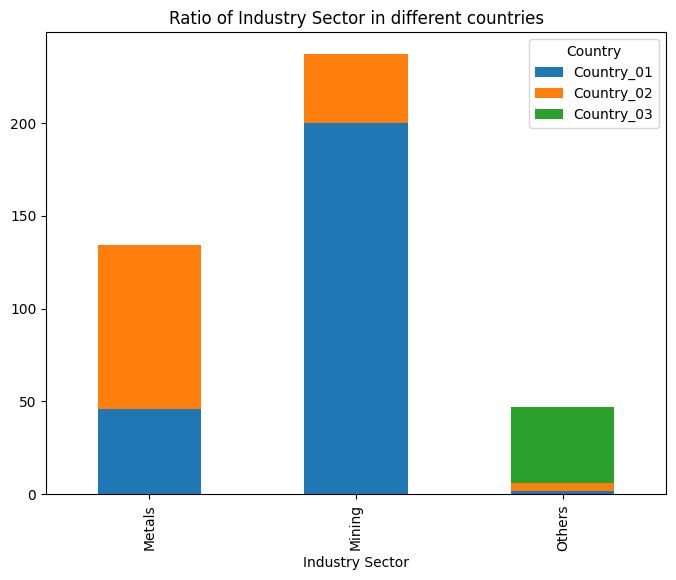

In [78]:
industry_sec_country_table = pd.crosstab(index = data['Industry Sector'], columns = data['Country'])
industry_sec_country_table.plot(kind = 'bar', figsize=(8,6), stacked = True)
plt.title("Ratio of Industry Sector in different countries")
plt.show()

In [46]:
func = lambda x : np.round(x/x.sum() * 100)
Ind_gender = data.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(func, axis=1)

hv.Bars(pd.melt(Ind_gender.reset_index(), ['Gender']), ['Gender','Industry Sector'], 'value').opts(opts.Bars(title="Industry Sector by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Gender,Industry Sector]   (value)

In [47]:
func = lambda x : np.round(x/x.sum() * 100)

accident_gender = data.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(func, axis=1)
ac = hv.Bars(pd.melt(accident_gender.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = data.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(func, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['Gender']), ['Gender','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Layout
   .Bars.I  :Bars   [Gender,Accident Level]   (value)
   .Bars.II :Bars   [Gender,Potential Accident Level]   (value)

In [48]:
func = lambda x : np.round(x/x.sum() * 100)

ac_em = data.groupby(['Employment Type','Accident Level'])['Accident Level'].count().unstack().apply(func, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ['Employment Type']), ['Employment Type','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))

pot_ac_em = data.groupby(['Employment Type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(func, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ['Employment Type']), ['Employment Type','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Employee type Count"))
(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))

:Layout
   .Bars.I  :Bars   [Employment Type,Accident Level]   (value)
   .Bars.II :Bars   [Employment Type,Potential Accident Level]   (value)

In [49]:
func = lambda x : np.round(x/x.sum() * 100)

ac_mo = data.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(func, axis=1).fillna(0)
ac = hv.Curve(ac_mo['I'], label='I') * hv.Curve(ac_mo['II'], label='II') * hv.Curve(ac_mo['III'], label='III') * hv.Curve(ac_mo['IV'], label='IV') * hv.Curve(ac_mo['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Month Count"))

pot_ac_mo = data.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(func, axis=1).fillna(0)
pot_ac = hv.Curve(pot_ac_mo['I'], label='I') * hv.Curve(pot_ac_mo['II'], label='II') * hv.Curve(pot_ac_mo['III'], label='III') * hv.Curve(pot_ac_mo['IV'], label='IV')\
        * hv.Curve(pot_ac_mo['V'], label='V') * hv.Curve(pot_ac_mo['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Month Count"))

(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Month]   (I)
      .Curve.II  :Curve   [Month]   (II)
      .Curve.III :Curve   [Month]   (III)
      .Curve.IV  :Curve   [Month]   (IV)
      .Curve.V   :Curve   [Month]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Month]   (I)
      .Curve.II  :Curve   [Month]   (II)
      .Curve.III :Curve   [Month]   (III)
      .Curve.IV  :Curve   [Month]   (IV)
      .Curve.V   :Curve   [Month]   (V)
      .Curve.VI  :Curve   [Month]   (VI)

In [71]:
data_corr = data[['Year','Month','Day','WeekofYear']].copy()
data_corr.corr()

,Year,Month,Day,WeekofYear
Year,1.000000,-0.416621,-0.001982,-0.418798
Month,-0.416621,1.000000,0.002133,0.964295
Day,-0.001982,0.002133,1.000000,0.060982
WeekofYear,-0.418798,0.964295,0.060982,1.000000


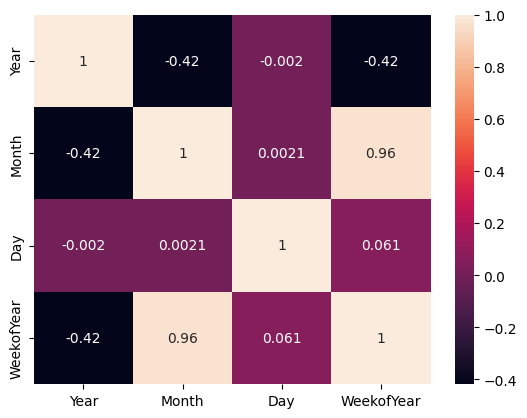

In [74]:
sns.heatmap(data_corr.corr(), annot=True);

In [79]:
data.head()

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1
